# Load Data

In [3]:
from sklearn import datasets

iris = datasets.load_iris()


# Explore the Data

Using iris['data'] you can obtain the the following attributes:
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm

The 'target' corrosponds to 3 seperate categories of flowers, 0, 1 and 2 - Flower type not important. 

More infomation here: - https://archive.ics.uci.edu/ml/datasets/iris

In this case we are using only 3 (i.e. petal length) to classify our model. 

In [4]:
iris['data'][:,3:]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [5]:
import numpy as np
X = iris['data'][:,3:]    #Petal Width ONLY
y = (iris['target']==2).astype(np.int)         #The '==2' gives a True or False (array), followed by the astype method gives an integer.

In [6]:
# (np.array([True, False])).astype(np.int) #a clear version of what the above does.

# Train Model

### In this case we are using a Logistical Regression, but as you will see later, we will use a Softmax Regression to identify the other classes of the data.

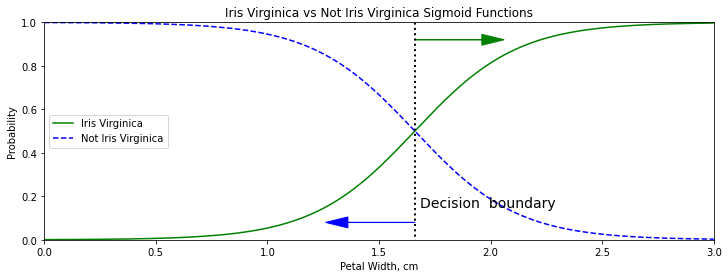

In [7]:
from sklearn.linear_model import LogisticRegression
%matplotlib inline
import matplotlib.pyplot as plt

log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1,1) #negative value implies we want numpy to figure out the number of rows, while
                                                #keeping the number of columns as 1
y_proba = log_reg.predict_proba(X_new)
y_proba #first number per list starts 'big' and gets smaller while the second number per list starts 'small' and gets bigger
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]  #finds the point of interection ~1.6

# This implies that we have 2 sigmoid functions (i.e. an S surve and y-reflection of that S surve at some point on the x-asis
plt.figure(figsize=(12,4))
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'Iris Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not Iris Virginica')
plt.legend(loc='center left')
plt.xlabel('Petal Width, cm')
plt.ylabel('Probability')
plt.title('Iris Virginica vs Not Iris Virginica Sigmoid Functions')
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.text(decision_boundary+0.025, 0.15, "Decision  boundary", fontsize=14, color="k", ha="left")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.axis([0, 3, 0, 1])

plt.show()

#### There is a cross over point where both the Sigmoid function interact. This implies that the there is a 'probability' that flower could be either type of flower. The model is 100% confident that once the flower is >2.5 it is an Iris Virginica. 

#### While <1 it is certain it is not. 

#### Nonetheless, if the Petal Width is right of the Decision Boundary the model will predict it is Iris Virginica (i.e. <u>></u>0.5). Even though it is not certain. 



# Feature Engineering - Adding Petal Length Feature

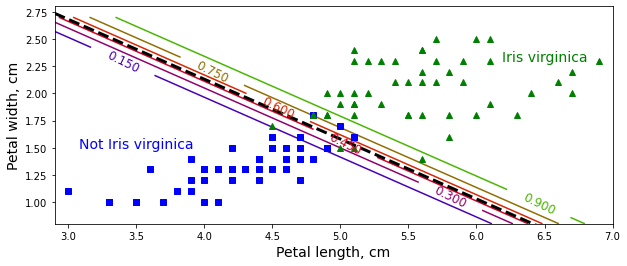

In [109]:
from sklearn.linear_model import LogisticRegression

#Obtain Data, X and y
X_2_features = iris['data'][:,2:] #Petal Length, Petal Width
y = (iris['target'] ==2).astype(np.int)

#Train Model
log_reg = LogisticRegression(random_state=42, solver='lbfgs', C=100000) #Use LBFGS for multi feature data set*
log_reg.fit(X_2_features, y)


#obtain all points from x, y (i.e. the points will be used to plot the Logistical Model)
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
#Combine the two feature values into 1 matrix (i.e. 2 column matrix with m instances)
X_new = np.c_[x0.ravel(), x1.ravel()]

#Obtain predictions of these values to plot
y_proba = log_reg.predict_proba(X_new)

#Figure size
plt.figure(figsize=(10, 4))

#Plot data when y=0, Not Iris Virginica and when y=1, Iris Virginica 
plt.plot(X_2_features[y==0, 0], X_2_features[y==0, 1], "bs")
plt.plot(X_2_features[y==1, 0], X_2_features[y==1, 1], "g^")

#Obtain y probabilities for values x0 and assign that to zz 
zz = y_proba[:, 1].reshape(x0.shape)

#plot contours - the other lines
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7]) #graph x value range

#equation of the a straight line using the points Logistic Regression coefficients and y-intecept, obtain a line.
#log_reg.coef_ is the coefficient of the features. Note the divide by sign and negative at the beginning.
# boundary = -mx+c
boundary = -(log_reg.coef_[0][0] *left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

#Label Probability Lines
plt.clabel(contour, inline=1, fontsize=12)

#50% probability line
plt.plot(left_right, boundary, "k--", linewidth=3)

#Label Classes
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")

#x and y axis labels
plt.xlabel("Petal length, cm", fontsize=14)
plt.ylabel("Petal width, cm", fontsize=14)

#axis plot
plt.axis([2.9, 7, 0.8, 2.8])

plt.show()

### What is 'Solver'? 

Be careful when using LBFGS, it is an approximation and it may not converge to anything if you do not safeguard. I have used it here because this is a small data set, and never used it before.

LBFGS comes from an approximation of Quasi-Newton methods. 

Rather than going into the detail BFGS comes from an approximation of Quasi-Newton methods, and stores several gradient values, wheres 'Limited' BFGS only stores a handful of values. Making this approach faster, but not as accurate. 


Other (favourable) methods include Stochastic Average Gradient which stores the most recent gradient value (using l2 penalisation, i.e. Euclidean). However, when it does converge, due to the random nature it will bounce around the minimum. 

Sci-kit Learn's documentation states that 'SAGA' is the best one, which is a variation of SAG but uses l1 penalisation instead (i.e. Manhatton Distance). SAGA 'It is faster than other solvers for large datasets, when both the number of samples and the number of features are large'. 

More info here: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

### Value of C?

The value of C is the inverse of regularization strength. 

For Logistic Regression the regularization strength (i.e. more relevant it will be for future data) is NOT alpha. The value is C which is the inverse of alpha, therefore, to increase regularisation we must decrease C. Higher values of C the less the model is regularized - overfitting. 


Note what happens when you change the value of C in the data from 0.0001 to 10000. 
Look at the spread in probability lines.


Here is the official definition according to Sci-kit Learn. 
C : float, default=1.0
        Inverse of regularization strength; must be a positive float.
        Like in support vector machines, smaller values specify stronger
        regularization.

# Multinomial Logistic Regression and Softmax Regression

Supporting multiple classes can also be done using Logistic Regression.

First we need to compute the score for each instance, x, and for each class, k (i.e. classes we want to classify to). Where s(x) <i> small </i>k is a score vector for class k.

Once we have the <b> Softmax score </b> for each class (k), we use the softmax function to determine the probability for each class.

The maximum value out of all the calculated (provided classes) probabilities will determine what the <b> Softmax Regression classifier </b> predicts (i.e. which class the instance refers to). Another way to think about it is the higher the score, the higher the probability thus prediction is made easier. 

The <b> Cross Entropy Cost Function </b> is used to penalize wrong predictions. The forumla contains y_target which is equivalent to 1 or 0 and number of, k, classes. When the number of classes is 2 then the model is the Log Loss equation. 

In [117]:
log_reg.predict([[5, 1], [5, 2.5]]) #Output =0 (Not Iris Virgnica) and =1 (Iris Virginica)

array([0, 1])

### Change 2 Class Logistical Regression to multi class by:

1. input the following into the LogisticRegression - multi_class = 'multinomial', solver='lbfgs', C=10



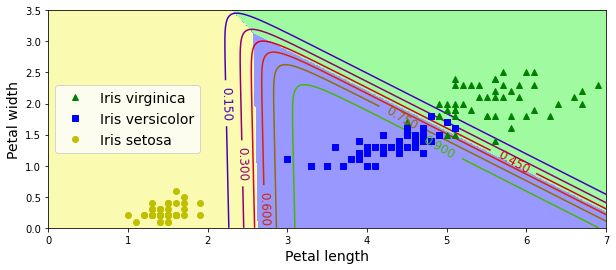

In [128]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
#get data
X = iris['data'][:,2:] #Petal Length, Petal Width
y = iris['target']

#train model
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

#scores and probabilities
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

#create a z values to plot x0 and y predict/probabilties 
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))

#When Target =2, then label it has Iris Virginica etc, plot Petal Length (horizontal) vs Width (Vertical),
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

#Select colours we want to use
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

#PLot contours - other lines
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

#Labels
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)

#Axis size
plt.axis([0, 7, 0, 3.5])
plt.show()

# Things to be aware of:

### Algorithm
When the number of features is large (i.e. think millions), it is memory intensive to either Singular Value Decomposition or the Normal Equation.

You should use Stochastic Regression model or mini-batch gradient Descent as both 'randomly' pick and instance, thus ONLY determining the gradient of that instance making it less memory intensive. This is because it only requires one instance in the memory at each iteration. They also reduce the learning rate, alpha, which speeds up (the approach of) convergence. 

### Scale
Always scale you data using an appropriate scaler either MinMax or StandardScaler. 

Otherwise, the model will take longer to converge and applying a regularization parameter will further complicate things.
The regularization will penalise features that have large values and will ignore smaller valued features as the model will see that they have virtually no effect in moving closer to the global minimum. 